# Linear Regression

In [4]:
# imports
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings
warnings.filterwarnings('ignore')

In [7]:
# reading the dataframes
df = pd.read_csv('df.csv')
df_20 = pd.read_csv('df_20.csv')

In [8]:
# functions
def data_split(d, t):
    test = d[d.year_week.isin(t)]
    train = d[~d.year_week.isin(t)]
    test.drop(['Weekly_Sales'], axis=1, inplace=True)
    train.drop(['Weekly_Sales'], axis=1, inplace=True)
    X_test = test.drop('Weekly_Sales_log', axis=1)
    y_test = test['Weekly_Sales_log']
    X_train = train.drop('Weekly_Sales_log', axis=1)
    y_train = train['Weekly_Sales_log']
    return X_test, y_test, X_train, y_train

def vis(y_test, y_pred, X_test):
    y = pd.DataFrame(X_test[:], columns=['test', 'pred'])
    y['test'] = np.expm1(y_test)
    y['pred'] = np.expm1(y_pred)
    ax = y.plot(figsize=(10,5),title="Model's Prediction Performance")
    ax.set_xlabel('data row id')
    ax.set_ylabel('weekly sales')
    ax

def accuracy(X_test,y_test, y_pred):
    print('accuracy (R^2):\n', model.score(X_test, y_test)*100, '%')

accuracy (R^2):
 11.562099711020291 %

 coefficients:
  [-1.21495468e-02  1.85250597e-03  5.18903728e-03  5.28490602e-02
 -1.90441458e-03  2.33343359e-02 -7.61869868e-04 -1.65426579e-02
  1.11359026e+00  3.73972419e-03 -3.24703265e-04]


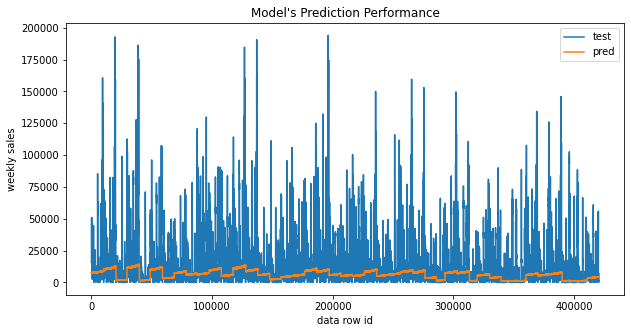

In [9]:
# linear Regression model -- all stores
X_test, y_test, X_train, y_train = data_split(df, np.linspace(201230, 201243))
model = LinearRegression(copy_X=True, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# performance
accuracy(X_test, y_test, y_pred)
vis(y_test, y_pred, X_test)
print('\n coefficients:\n ', model.coef_)

accuracy (R^2):
 11.415722867193633 %

 coefficients:
  [-1.24182109e-02  1.84323322e-03  4.78642678e-02 -7.28338008e-04
  1.11618087e+00  3.55985044e-03]


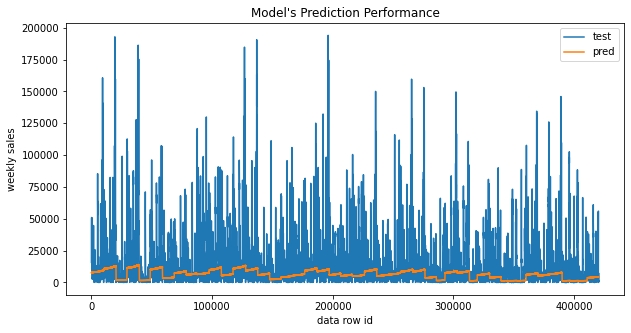

In [10]:
# linear Regression model -- all stores -- important features
df.drop(['Fuel_Price'], axis=1, inplace=True)
df.drop(['IsHoliday'], axis=1, inplace=True)
df.drop(['Temperature'], axis=1, inplace=True)
df.drop(['Unemployment'], axis=1, inplace=True)
X_test, y_test, X_train, y_train = data_split(df, np.linspace(201230, 201243))
X_train.drop(['year_week'], axis=1, inplace=True)
X_test.drop(['year_week'], axis=1, inplace=True)
model = LinearRegression(copy_X=True, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# performance
accuracy(X_test, y_test, y_pred)
vis(y_test, y_pred, X_test)
print('\n coefficients:\n ', model.coef_)